# **Benchmark -** Plots

___
___

### **1. Initialization**

#### *1.A. Imports*

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import seaborn as sns

from offbench.utils.logger import extract_metrics_from_event_file
from offbench.utils.paths import WORKSPACE_PATH
from hydra import compose, initialize
from omegaconf import DictConfig
from typing import Union

#### *1.B. Data*

In [3]:
METHODS = [
    "SC1", "SCN", "FT1", "FTN", "FRZ",
    "RPL", "EWC", "L2", "PNN", "HiSPO"
]

In [4]:
amazeville_random = pd.read_csv("./1_random_streams/godot_goal_amazeville/analysis.csv")
amazeville_random["STREAM"] = "AR"

amazeville_topological = pd.read_csv("./2_topological_streams/godot_goal_amazeville/analysis.csv")
amazeville_topological["STREAM"] = "AT"

simpletown_topological = pd.read_csv("./2_topological_streams/godot_goal_simpletown/analysis.csv")
simpletown_topological["STREAM"] = "ST"

data = pd.concat([amazeville_random, amazeville_topological, simpletown_topological])
data = data[[
    "STREAM", "method", 
    "PER_mean",
    "BWT_mean",
    "FWT_mean",
    "HIGH_MEM_inference_mean",
    "HIGH_MEM_total_mean",	
    "LOW_MEM_inference_mean",	
    "LOW_MEM_total_mean",	
    "MEM_inference_mean",	
    "MEM_total_mean"
]]

data = data.reset_index(drop=True)

# rename columns
data = data.rename(columns={
    "method": "METHOD",
    "PER_mean": "PER",
    "BWT_mean": "BWT",
    "FWT_mean": "FWT",
    "HIGH_MEM_inference_mean": "HIGH_MEM_inference",
    "HIGH_MEM_total_mean": "HIGH_MEM_total",
    "LOW_MEM_inference_mean": "LOW_MEM_inference",
    "LOW_MEM_total_mean": "LOW_MEM_total",
    "MEM_inference_mean": "MEM_inference",
    "MEM_total_mean": "MEM_total"
})

In [5]:
data

,STREAM,METHOD,PER,BWT,FWT,HIGH_MEM_inference,HIGH_MEM_total,LOW_MEM_inference,LOW_MEM_total,MEM_inference,MEM_total
0,AR,PNN,92.2,0.0,8.1,9.9,9.9,9.9,9.9,9.9,9.9
1,AR,HiSPO,86.4,0.0,2.3,3.5,3.5,3.5,3.5,3.5,3.5
2,AR,FTN,85.4,0.0,1.3,4.0,4.0,4.0,4.0,4.0,4.0
3,AR,SCN,84.1,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0
4,AR,RPL,81.1,-0.8,-2.3,1.0,1.0,1.0,1.0,1.0,1.0
5,AR,EWC,54.4,-33.1,3.4,1.0,9.0,1.0,9.0,1.0,9.0
6,AR,SC1,54.1,-30.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
7,AR,FT1,53.7,-31.7,1.3,1.0,1.0,1.0,1.0,1.0,1.0
8,AR,FRZ,49.3,0.0,-34.9,1.0,1.0,1.0,1.0,1.0,1.0
9,AR,L2,39.9,-29.8,-14.5,1.0,5.0,1.0,5.0,1.0,5.0


___


### **2. Plots**

#### *2.A. BWT & FWT*

C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2770859317.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=18, fontweight='bold')
C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2770859317.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['- 10', '- 1', 0, '+ 1', '+ 10'], fontsize=18, fontweight='bold')


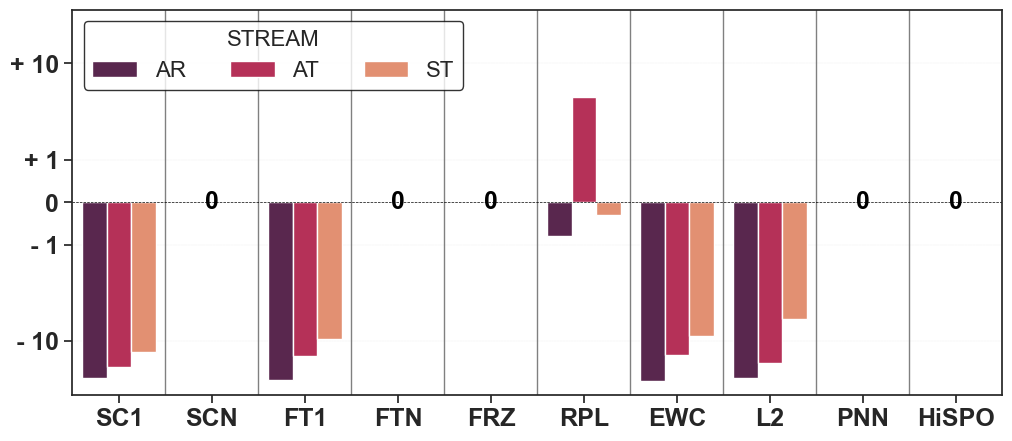

In [6]:
data_bwt = data[["STREAM", "METHOD", "BWT"]]

sns.set_theme(style="ticks")

plt.figure(figsize=(12, 5))

ax = sns.barplot(
    x="METHOD", 
    y="BWT", 
    hue="STREAM",
    data=data_bwt, 
    order=METHODS,
    width=0.8,
    palette="rocket",
)

# get x-tick positions (centers of the method groups)
xticks = ax.get_xticks()
for i in range(len(xticks)-1):
    # compute the midpoint between adjacent ticks
    x_sep = (xticks[i] + xticks[i+1]) / 2
    ax.axvline(x=x_sep, color='gray', linewidth=1.0, linestyle='-')

# list of methods to annotate with a central zero
methods_to_annotate = ["SCN", "FTN", "FRZ", "PNN", "HiSPO"]

for label, x in zip(ax.get_xticklabels(), ax.get_xticks()):
    if label.get_text() in methods_to_annotate:
        ax.text(x, 0, "0", ha='center', va='center', fontsize=18, fontweight='bold', color='black')

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_xlabel("")

ax.set_ylim(-50, 50)
ax.set_yscale("symlog")
ax.set_yticklabels(['- 10', '- 1', 0, '+ 1', '+ 10'], fontsize=18, fontweight='bold')
ax.set_ylabel("")

# plot lines at 0 (larger), -1 (smaller), 1 (smaller), 10 (smaller), -10 (smaller)
ax.axhline(-10, color='gray', linewidth=0.05, linestyle='-.', zorder=0)
ax.axhline(-1, color='gray', linewidth=0.05, linestyle='--', zorder=0)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axhline(1, color='gray', linewidth=0.05, linestyle='--', zorder=0)
ax.axhline(10, color='gray', linewidth=0.05, linestyle='--', zorder=0)

# place legend in a row at top left, with box contoured by a black line
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), fontsize=16, title="STREAM", ncol=3, title_fontsize=16, edgecolor='black')

# save as pdf
plt.savefig("./plots/bwt.pdf", bbox_inches='tight')

C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2482892511.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=18, fontweight='bold')
C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2482892511.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['- 10', '- 1', 0, '+ 1', '+ 10'], fontsize=18, fontweight='bold')


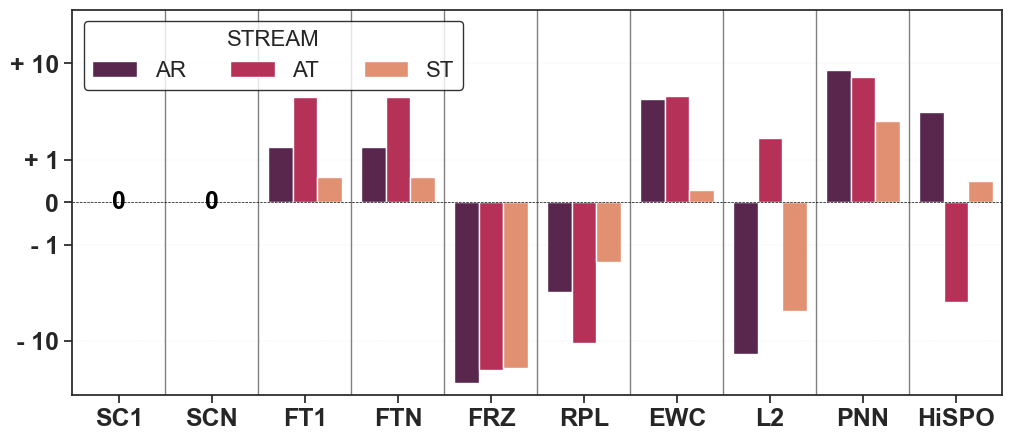

In [7]:
data_fwt = data[["STREAM", "METHOD", "FWT"]]

sns.set_theme(style="ticks")

plt.figure(figsize=(12, 5))

ax = sns.barplot(
    x="METHOD", 
    y="FWT", 
    hue="STREAM",
    data=data_fwt, 
    order=METHODS,
    width=0.8,
    palette="rocket"
)

# get x-tick positions (centers of the method groups)
xticks = ax.get_xticks()
for i in range(len(xticks)-1):
    # compute the midpoint between adjacent ticks
    x_sep = (xticks[i] + xticks[i+1]) / 2
    ax.axvline(x=x_sep, color='gray', linewidth=1.0, linestyle='-')

# list of methods to annotate with a central zero
methods_to_annotate = ["SC1", "SCN"]

for label, x in zip(ax.get_xticklabels(), ax.get_xticks()):
    if label.get_text() in methods_to_annotate:
        ax.text(x, 0, "0", ha='center', va='center', fontsize=18, fontweight='bold', color='black')
    
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=18, fontweight='bold')
ax.set_xlabel("")

ax.set_ylim(-50, 50)
ax.set_yscale("symlog")
ax.set_yticklabels(['- 10', '- 1', 0, '+ 1', '+ 10'], fontsize=18, fontweight='bold')
ax.set_ylabel("")

# plot lines at 0 (larger), -1 (smaller), 1 (smaller), 10 (smaller), -10 (smaller)
ax.axhline(-10, color='gray', linewidth=0.05, linestyle='-.', zorder=0)
ax.axhline(-1, color='gray', linewidth=0.05, linestyle='--', zorder=0)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axhline(1, color='gray', linewidth=0.05, linestyle='--', zorder=0)
ax.axhline(10, color='gray', linewidth=0.05, linestyle='--', zorder=0)

# place legend in a row at top left
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(0.0, 1.0), 
    fontsize=16, 
    title="STREAM", 
    ncol=3, 
    title_fontsize=16, 
    edgecolor='black',
)

# save as pdf
plt.savefig("./plots/fwt.pdf", bbox_inches='tight')

#### *2.B. Model Size - Inference*

In [8]:
# For SC1, FT1, FRZ, RPL, EWC, L2, SCN, FTN, PNN it is straightforward to compute the relative sizes

high_base, low_base = 0.6543, 0.6631

data_mem = {

    "METHOD": [

        "SC1 - FT1 - FRZ - RPL - EWC - L2",
        "SC1 - FT1 - FRZ - RPL - EWC - L2",
        "SC1 - FT1 - FRZ - RPL - EWC - L2",
        "SC1 - FT1 - FRZ - RPL - EWC - L2",

        "SCN - FTN",
        "SCN - FTN",
        "SCN - FTN",
        "SCN - FTN",

        "PNN", "PNN", "PNN", "PNN",
    
        # AR1
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # AR2
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # AT1
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # AT2
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # ST1
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # ST2
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

    ],

    "HIGH_MEM": [

        1.0, 1.0, 1.0, 1.0,

        1.0, 2.0, 3.0, 4.0,

        0.6543 / high_base, 2.2071 / high_base, 4.157 / high_base, 6.506 / high_base,

        # AR1
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

        # AR2
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,

        # AT1
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 2.0,

        # AT2
        1.0, 1.0, 2.0, 3.0,
        1.0, 1.0, 2.0, 3.0,
        1.0, 2.0, 3.0, 4.0,

        # ST1
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,

        # ST2
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

    ],

    "LOW_MEM": [

        1.0, 1.0, 1.0, 1.0,

        1.0, 2.0, 3.0, 4.0,

        0.6631 / low_base, 2.2234 / low_base, 4.212 / low_base, 6.596 / low_base,

        # AR1
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

        # AR2
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,

        # AT1
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 3.0,

        # AT2
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,

        # ST1
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,

        # ST2
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

    ],

    "TASK_IDX": [

        1, 2, 3, 4,

        1, 2, 3, 4,

        1, 2, 3, 4,

        # AR1
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # AR2
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # AT1
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # AT2
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # ST1
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # ST2
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

    ]

}

data_mem = pd.DataFrame(data_mem)

In [9]:
data_mem

,METHOD,HIGH_MEM,LOW_MEM,TASK_IDX
0,SC1 - FT1 - FRZ - RPL - EWC - L2,1.0,1.0,1
1,SC1 - FT1 - FRZ - RPL - EWC - L2,1.0,1.0,2
2,SC1 - FT1 - FRZ - RPL - EWC - L2,1.0,1.0,3
3,SC1 - FT1 - FRZ - RPL - EWC - L2,1.0,1.0,4
4,SCN - FTN,1.0,1.0,1
...,...,...,...,...
79,HiSPO,3.0,3.0,4
80,HiSPO,1.0,1.0,1
81,HiSPO,2.0,2.0,2
82,HiSPO,3.0,3.0,3


In [11]:
sns.set_theme(style="ticks")

fig, (ax1, ax2) = plt.subplots figsize=(14, 8))

###########################
# PLOT 1: Relative HIGH_MEM
###########################

if True:

    plot1 = sns.lineplot(
        data=data_mem,
        x="TASK_IDX",
        y="HIGH_MEM",
        hue="METHOD",
        style="METHOD",
        markers=True,
        markersize=25,
        linewidth=7.0,
        ax=ax1,
        palette="rocket_r",
        legend="full"
    )

    # remove the local legend from ax1
    ax1.legend_.remove()

    # configure ax1
    ax1.set_xlim(0.75, 4.25)
    ax1.set_xticks([1, 2, 3, 4])
    ax1.set_xticklabels(["Task 1", "Task 2", "Task 3", "Task 4"], fontsize=24, fontweight='bold', y=-0.025)
    ax1.set_xlabel("")
    for i in range(1, 5):
        ax1.axvline(i, color='gray', linewidth=0.125, linestyle='--')

    ax1.set_ylim(0.0, 10.5)
    ax1.set_yticks([1.0, 2.5, 5.0, 7.5, 10.0])
    ax1.set_yticklabels(["1.0", "2.5", "5.0", "7.5", "10.0"], fontsize=24, fontweight='bold')
    ax1.set_ylabel("")
    for yline in [1.0, 2.5, 5.0, 7.5, 10.0]:
        ax1.axhline(yline, color='gray', linewidth=0.125, linestyle='--')

    ax1.set_title("High Memory ( Inference )", fontsize=28, fontweight='bold', y=1.05)

    ##########################
    # PLOT 2: Relative LOW_MEM
    ##########################

    plot2 = sns.lineplot(
        data=data_mem,
        x="TASK_IDX",
        y="LOW_MEM",
        hue="METHOD",
        style="METHOD",
        markers=True,
        markersize=25,
        linewidth=7.0,
        ax=ax2,
        palette="rocket_r",
        legend="full"
    )

    # remove the local legend from ax2
    ax2.legend_.remove()

    # configure ax2
    ax2.set_xlim(0.75, 4.25)
    ax2.set_xticks([1, 2, 3, 4])
    ax2.set_xticklabels(["Task 1", "Task 2", "Task 3", "Task 4"], fontsize=24, fontweight='bold', y=-0.025)
    ax2.set_xlabel("")
    for i in range(1, 5):
        ax2.axvline(i, color='gray', linewidth=0.125, linestyle='--')
    ax2.set_ylim(0.0, 10.5)
    ax2.set_yticks([])
    ax2.set_ylabel("")
    for yline in [1.0, 2.5, 5.0, 7.5, 10.0]:
        ax2.axhline(yline, color='gray', linewidth=0.125, linestyle='--')

    ax2.set_title("Low Memory ( Inference )", fontsize=28, fontweight='bold', y=1.05)

    ########################
    # CREATE A SINGLE LEGEND
    ########################

    # collect handles and labels from one of the axes
    handles, labels = ax1.get_legend_handles_labels()

    # place a single legend in a row at the bottom
    fig.legend(
        handles, labels,
        loc='lower center',
        bbox_to_anchor=(0.5125, -0.1),
        ncol=4,
        fontsize=22,
        title="",
        title_fontsize=20,
        edgecolor='black',
        prop={'weight': 'bold', 'size': 22}
    )

    # SAVE

    plt.tight_layout(w_pad=0.5, h_pad=5.0)
    plt.savefig("./plots/mem.pdf", bbox_inches='tight')
    plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

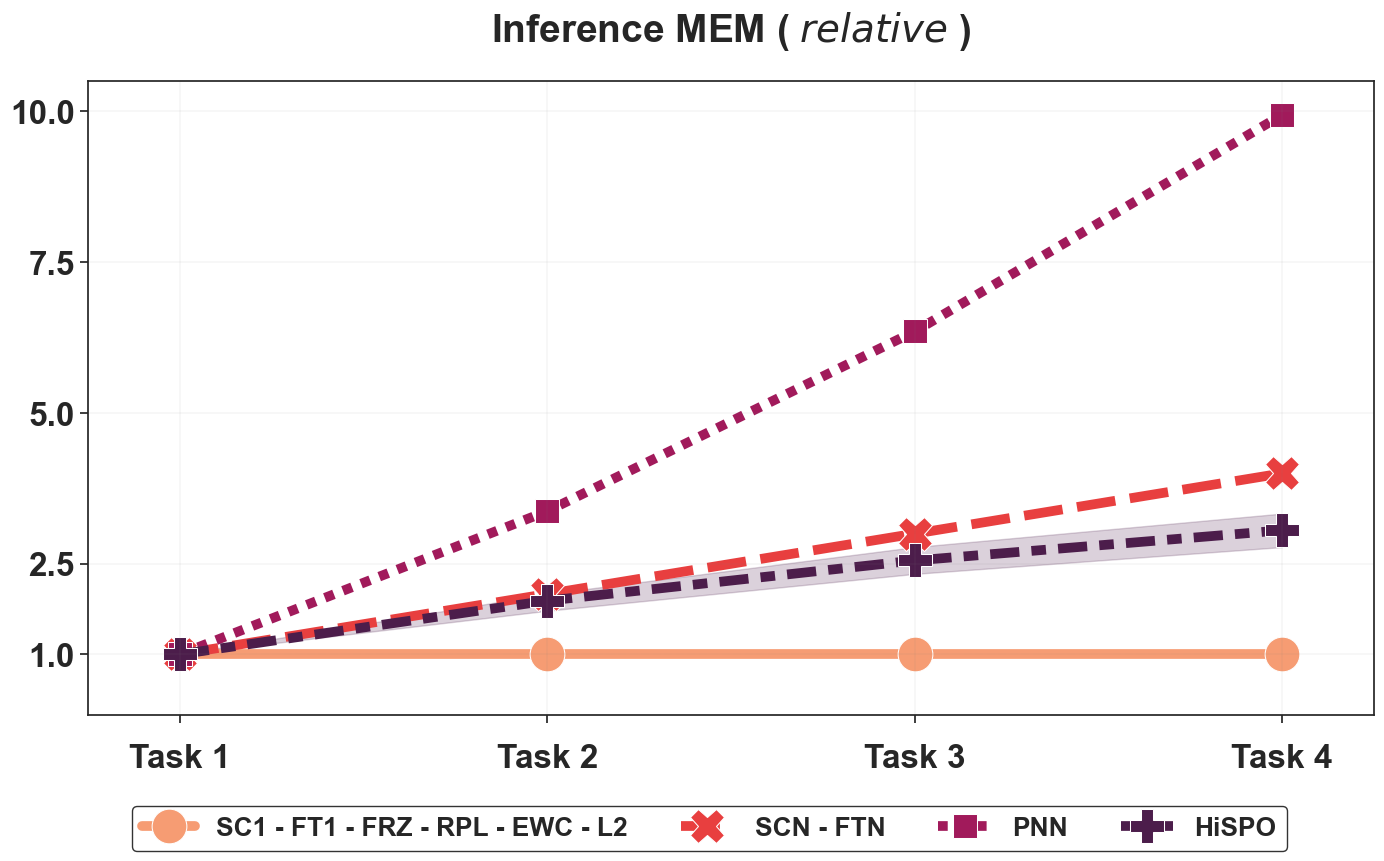

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

METHOD_ORDER = ["SC1 - FT1 - FRZ - RPL - EWC - L2", "SCN - FTN", "PNN", "HiSPO"]
my_palette = sns.color_palette("rocket_r", n_colors=len(METHOD_ORDER))

if True:

    sns.set_theme(style="ticks")

    # Create a single subplot (no second axis)
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the HIGH_MEM data
    plot1 = sns.lineplot(
        data=data_mem,
        x="TASK_IDX",
        y="HIGH_MEM",
        hue="METHOD",
        style="METHOD",
        markers=True,
        markersize=25,
        linewidth=7.0,
        ax=ax,
        hue_order=METHOD_ORDER,
        style_order=METHOD_ORDER,
        palette=my_palette,
        legend="full"
    )

    # Remove local legend from ax
    ax.legend_.remove()

    # Configure x-axis
    ax.set_xlim(0.75, 4.25)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(["Task 1", "Task 2", "Task 3", "Task 4"],
                       fontsize=24, fontweight='bold', y=-0.025)
    ax.set_xlabel("")
    for i in range(1, 5):
        ax.axvline(i, color='gray', linewidth=0.125, linestyle='--')

    # Configure y-axis
    ax.set_ylim(0.0, 10.5)
    ax.set_yticks([1.0, 2.5, 5.0, 7.5, 10.0])
    ax.set_yticklabels(["1.0", "2.5", "5.0", "7.5", "10.0"],
                       fontsize=24, fontweight='bold')
    ax.set_ylabel("")
    for yline in [1.0, 2.5, 5.0, 7.5, 10.0]:
        ax.axhline(yline, color='gray', linewidth=0.125, linestyle='--')

    # Set title to "Inference MEM"
    ax.set_title("Inference MEM ( $relative$ )", fontsize=28, fontweight='bold', y=1.05)

    # Collect handles and labels for a single legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc='lower center',
        bbox_to_anchor=(0.5125, -0.09),
        ncol=6,
        fontsize=20,
        title="",
        title_fontsize=20,
        edgecolor='black',
        prop={'weight': 'bold', 'size': 19}
    )

    plt.tight_layout()
    plt.savefig("./plots/inference_mem.pdf", bbox_inches='tight')
    plt.show()


#### *2.C. Model Size - Training*

In [ ]:
# For SC1, FT1, FRZ, RPL, EWC, L2, SCN, FTN, PNN it is straightforward to compute the relative sizes

high_base, low_base = 0.6543, 0.6631

data_mem_training = {

    "METHOD": [

        "SC1 - FT1 - FRZ - RPL",
        "SC1 - FT1 - FRZ - RPL",
        "SC1 - FT1 - FRZ - RPL",
        "SC1 - FT1 - FRZ - RPL",

        "SCN - FTN",
        "SCN - FTN",
        "SCN - FTN",
        "SCN - FTN",

        "EWC", "EWC", "EWC", "EWC",

        "L2", "L2", "L2", "L2",

        "PNN", "PNN", "PNN", "PNN",
    
        # AR1
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # AR2
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # AT1
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # AT2
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # ST1
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

        # ST2
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO",

    ],

    "HIGH_MEM": [

        1.0, 1.0, 1.0, 1.0,

        1.0, 2.0, 3.0, 4.0,

        1.963 / high_base, 3.272 / high_base, 4.58 / high_base, 5.889 / high_base,

        1.309 / high_base, 1.963 / high_base, 2.617 / high_base, 3.272 / high_base,

        0.6543 / high_base, 2.2071 / high_base, 4.157 / high_base, 6.506 / high_base,

        # AR1
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

        # AR2
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,

        # AT1
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 2.0,

        # AT2
        1.0, 1.0, 2.0, 3.0,
        1.0, 1.0, 2.0, 3.0,
        1.0, 2.0, 3.0, 4.0,

        # ST1
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,

        # ST2
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

    ],

    "LOW_MEM": [

        1.0, 1.0, 1.0, 1.0,

        1.0, 2.0, 3.0, 4.0,

        1.989 / low_base, 3.316 / low_base, 4.642 / low_base, 5.968 / low_base,

        1.326 / low_base, 1.989 / low_base, 2.653 / low_base, 3.316 / low_base,

        0.6631 / low_base, 2.2234 / low_base, 4.212 / low_base, 6.596 / low_base,

        # AR1
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

        # AR2
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,

        # AT1
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 2.0,
        1.0, 2.0, 2.0, 3.0,

        # AT2
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,
        1.0, 2.0, 3.0, 4.0,

        # ST1
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,
        1.0, 2.0, 2.0, 3.0,

        # ST2
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,
        1.0, 2.0, 3.0, 3.0,

    ],

    "TASK_IDX": [

        1, 2, 3, 4,

        1, 2, 3, 4,

        1, 2, 3, 4,

        1, 2, 3, 4,
        
        1, 2, 3, 4,

        # AR1
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # AR2
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # AT1
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # AT2
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # ST1
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

        # ST2
        1, 2, 3, 4,
        1, 2, 3, 4,
        1, 2, 3, 4,

    ]

}

data_mem_training = pd.DataFrame(data_mem_training)

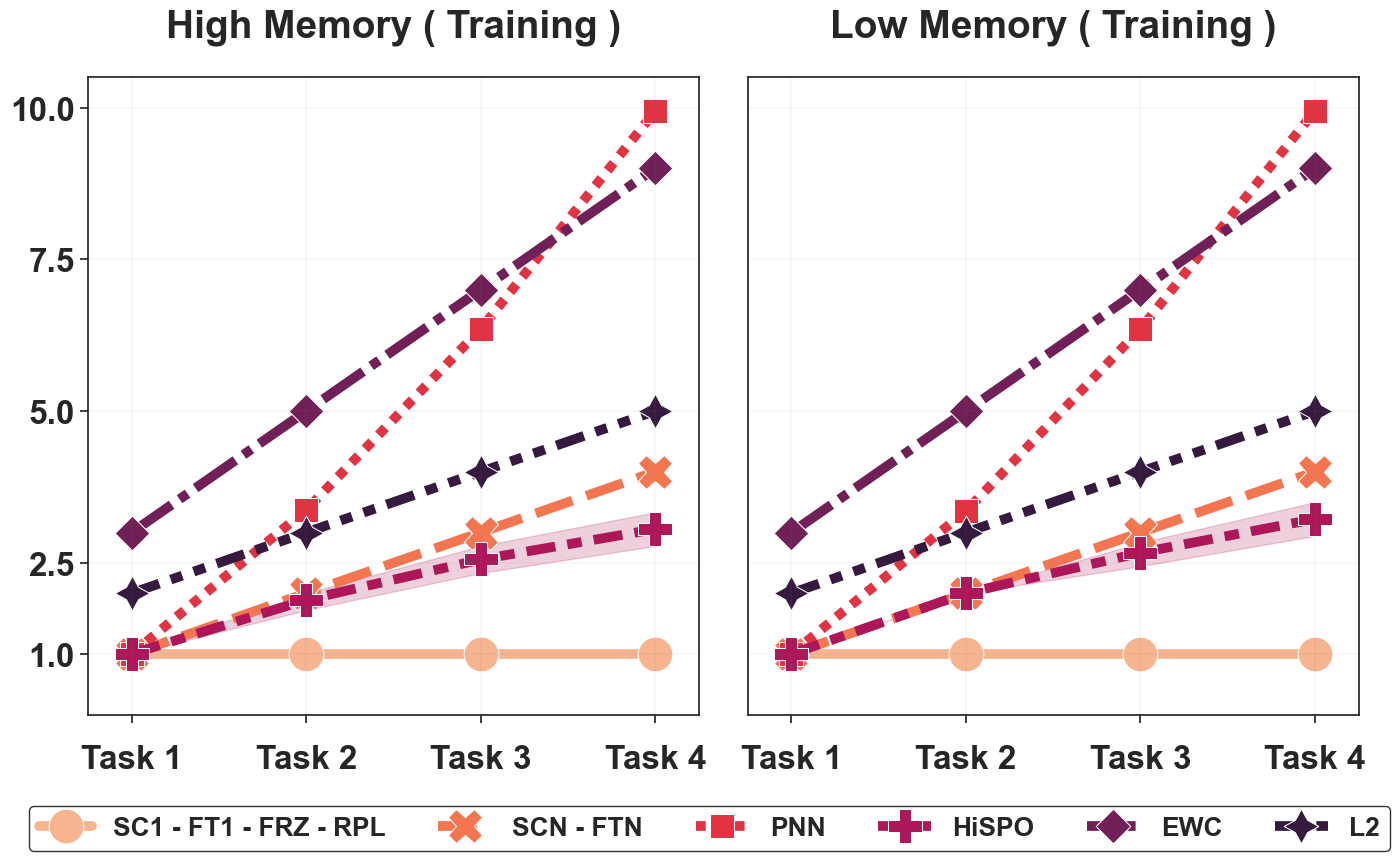

In [ ]:
sns.set_theme(style="ticks")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

METHOD_ORDER = ["SC1 - FT1 - FRZ - RPL", "SCN - FTN", "PNN", "HiSPO", "EWC", "L2"]
my_palette = sns.color_palette("rocket_r", n_colors=len(METHOD_ORDER))

###########################
# PLOT 1: Relative HIGH_MEM
###########################

if True:

    plot1 = sns.lineplot(
        data=data_mem_training,
        x="TASK_IDX",
        y="HIGH_MEM",
        hue="METHOD",
        style="METHOD",
        markers=True,
        markersize=25,
        linewidth=7.0,
        ax=ax1,
        hue_order=METHOD_ORDER,
        style_order=METHOD_ORDER,
        palette=my_palette,
        legend="full"
    )

    # remove the local legend from ax1
    ax1.legend_.remove()

    # configure ax1
    ax1.set_xlim(0.75, 4.25)
    ax1.set_xticks([1, 2, 3, 4])
    ax1.set_xticklabels(["Task 1", "Task 2", "Task 3", "Task 4"], fontsize=24, fontweight='bold', y=-0.025)
    ax1.set_xlabel("")
    for i in range(1, 5):
        ax1.axvline(i, color='gray', linewidth=0.125, linestyle='--')

    ax1.set_ylim(0.0, 10.5)
    ax1.set_yticks([1.0, 2.5, 5.0, 7.5, 10.0])
    ax1.set_yticklabels(["1.0", "2.5", "5.0", "7.5", "10.0"], fontsize=24, fontweight='bold')
    ax1.set_ylabel("")
    for yline in [1.0, 2.5, 5.0, 7.5, 10.0]:
        ax1.axhline(yline, color='gray', linewidth=0.125, linestyle='--')

    ax1.set_title("High Memory ( Training )", fontsize=28, fontweight='bold', y=1.05)

    ##########################
    # PLOT 2: Relative LOW_MEM
    ##########################

    plot2 = sns.lineplot(
        data=data_mem_training,
        x="TASK_IDX",
        y="LOW_MEM",
        hue="METHOD",
        style="METHOD",
        markers=True,
        markersize=25,
        linewidth=7.0,
        ax=ax2,
        hue_order=METHOD_ORDER,
        style_order=METHOD_ORDER,
        palette=my_palette,
        legend="full"
    )

    # remove the local legend from ax2
    ax2.legend_.remove()

    # configure ax2
    ax2.set_xlim(0.75, 4.25)
    ax2.set_xticks([1, 2, 3, 4])
    ax2.set_xticklabels(["Task 1", "Task 2", "Task 3", "Task 4"], fontsize=24, fontweight='bold', y=-0.025)
    ax2.set_xlabel("")
    for i in range(1, 5):
        ax2.axvline(i, color='gray', linewidth=0.125, linestyle='--')
    ax2.set_ylim(0.0, 10.5)
    ax2.set_yticks([])
    ax2.set_ylabel("")
    for yline in [1.0, 2.5, 5.0, 7.5, 10.0]:
        ax2.axhline(yline, color='gray', linewidth=0.125, linestyle='--')

    ax2.set_title("Low Memory ( Training )", fontsize=28, fontweight='bold', y=1.05)

    ########################
    # CREATE A SINGLE LEGEND
    ########################

    # collect handles and labels from one of the axes
    handles, labels = ax1.get_legend_handles_labels()

    # place a single legend in a row at the bottom
    fig.legend(
        handles, labels,
        loc='lower center',
        bbox_to_anchor=(0.5125, -0.09),
        ncol=6,
        fontsize=20,
        title="",
        title_fontsize=20,
        edgecolor='black',
        prop={'weight': 'bold', 'size': 19}
    )

    # SAVE

    plt.tight_layout()
    plt.savefig("./plots/mem_all.pdf", bbox_inches='tight')
    plt.show()

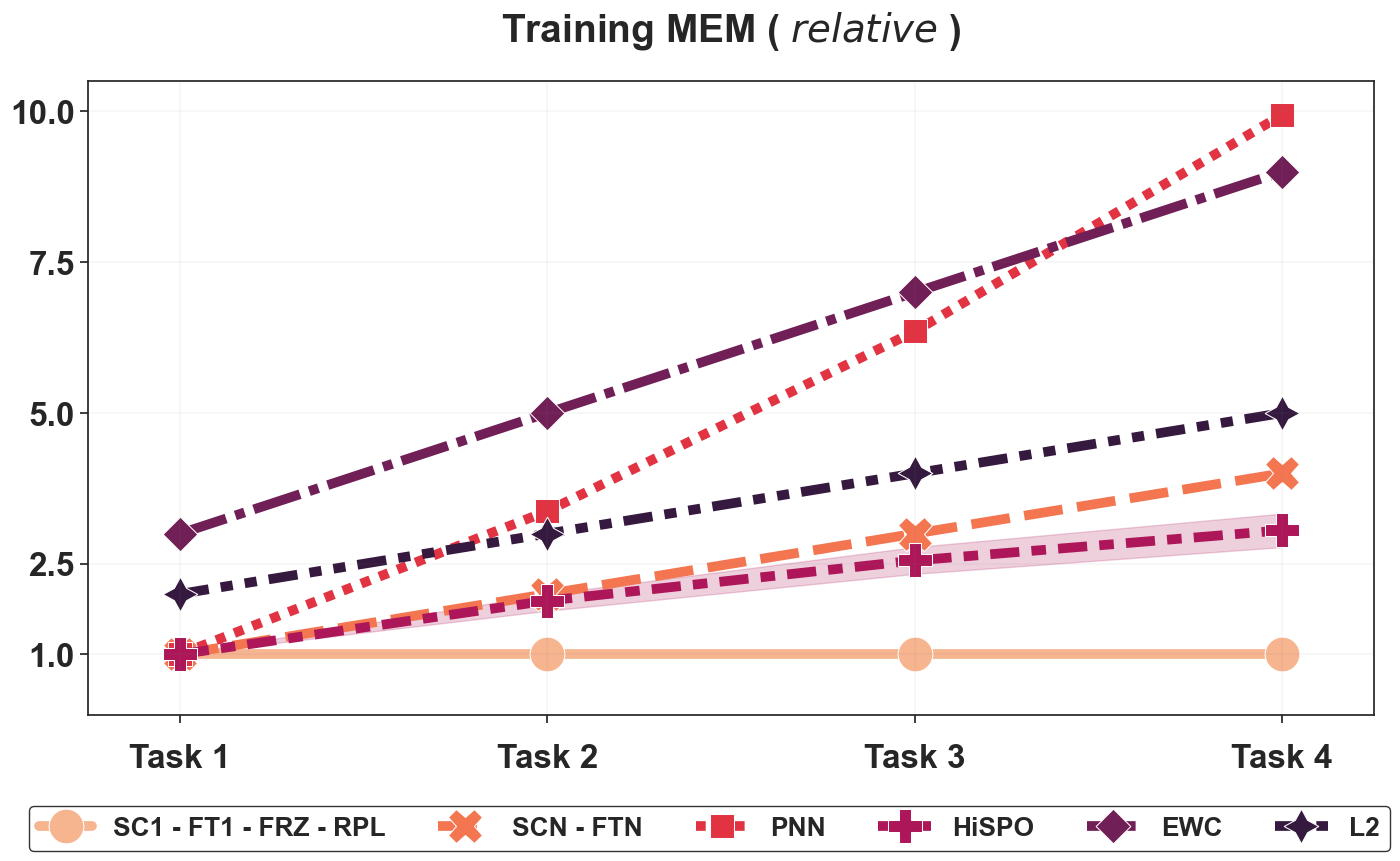

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

METHOD_ORDER = ["SC1 - FT1 - FRZ - RPL", "SCN - FTN", "PNN", "HiSPO", "EWC", "L2"]
my_palette = sns.color_palette("rocket_r", n_colors=len(METHOD_ORDER))

if True:

    sns.set_theme(style="ticks")

    # Create a single subplot (no second axis)
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the HIGH_MEM data
    plot1 = sns.lineplot(
        data=data_mem_training,
        x="TASK_IDX",
        y="HIGH_MEM",
        hue="METHOD",
        style="METHOD",
        markers=True,
        markersize=25,
        linewidth=7.0,
        ax=ax,
        hue_order=METHOD_ORDER,
        style_order=METHOD_ORDER,
        palette=my_palette,
        legend="full"
    )

    # Remove local legend from ax
    ax.legend_.remove()

    # Configure x-axis
    ax.set_xlim(0.75, 4.25)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(["Task 1", "Task 2", "Task 3", "Task 4"],
                       fontsize=24, fontweight='bold', y=-0.025)
    ax.set_xlabel("")
    for i in range(1, 5):
        ax.axvline(i, color='gray', linewidth=0.125, linestyle='--')

    # Configure y-axis
    ax.set_ylim(0.0, 10.5)
    ax.set_yticks([1.0, 2.5, 5.0, 7.5, 10.0])
    ax.set_yticklabels(["1.0", "2.5", "5.0", "7.5", "10.0"],
                       fontsize=24, fontweight='bold')
    ax.set_ylabel("")
    for yline in [1.0, 2.5, 5.0, 7.5, 10.0]:
        ax.axhline(yline, color='gray', linewidth=0.125, linestyle='--')

    # Set title to "Inference MEM"
    ax.set_title("Training MEM ( $relative$ )", fontsize=28, fontweight='bold', y=1.05)

    # Collect handles and labels for a single legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc='lower center',
        bbox_to_anchor=(0.5125, -0.09),
        ncol=6,
        fontsize=20,
        title="",
        title_fontsize=20,
        edgecolor='black',
        prop={'weight': 'bold', 'size': 19}
    )

    plt.tight_layout()
    plt.savefig("./plots/training_mem.pdf", bbox_inches='tight')
    plt.show()


#### *2.D. Training Duration*

In [ ]:
# reported from avalaible logs

data_time_training = {

    "METHODS": [
        
        "SC1", "SCN", "FT1", "FTN", 
        "FRZ", 
        "RPL", 
        "EWC", 
        "L2", 
        "PNN", 
        "HiSPO",
    
    ],

    "TIME": [

        23 * 4, 23 * 4, 23 * 4, 23 * 4, 
        23,
        25 * 4,
        25 + 37 + 49 + 57,
        25 + 30 + 37 + 45,
        25 + 40 + 44 + 50,
        27 + 50 + 80 + 85

    ]

}

data_time_training = pd.DataFrame(data_time_training)

C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_19188\1784562947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_19188\1784562947.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=18, fontweight='bold', y=-0.025)


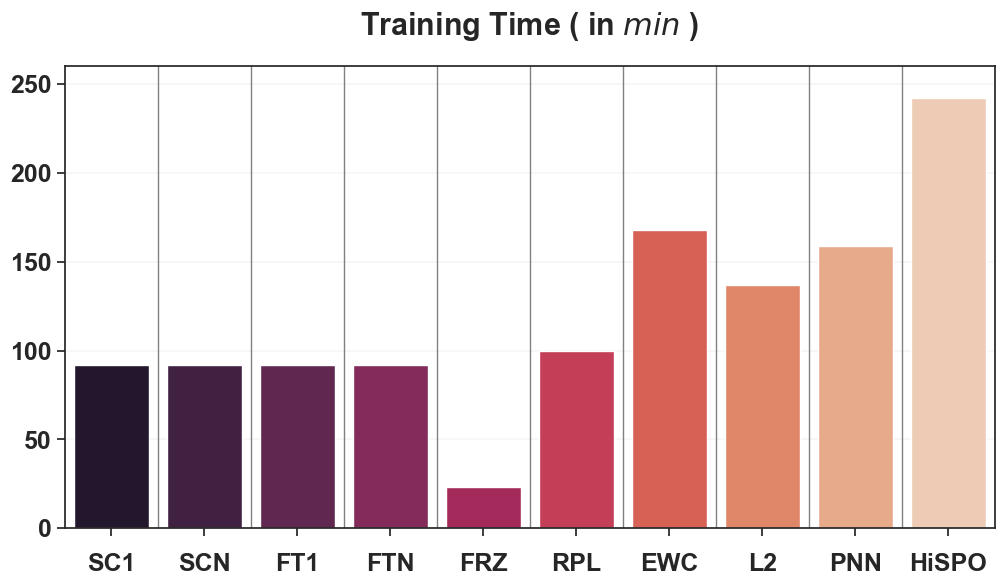

In [ ]:
# plot histogram
# x -> methods
# y -> time

sns.set_theme(style="ticks")

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x="METHODS", 
    y="TIME", 
    data=data_time_training, 
    palette="rocket",
    order=METHODS,
    linewidth=1.0
)

# get x-tick positions (centers of the method groups)
xticks = ax.get_xticks()
for i in range(len(xticks)-1):
    # compute the midpoint between adjacent ticks
    x_sep = (xticks[i] + xticks[i+1]) / 2
    ax.axvline(x=x_sep, color='gray', linewidth=1.0, linestyle='-')

# list of methods to annotate with a central zero
methods_to_annotate = ["SC1", "SCN", "FT1", "FTN", "FRZ", "RPL", "EWC", "L2", "PNN", "HiSPO"]

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=18, fontweight='bold', y=-0.025)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(0, 260)
ax.set_yticks([0, 50, 100, 150, 200, 250])
ax.set_yticklabels(["0", "50", "100", "150", "200", "250"], fontsize=18, fontweight='bold')

# grid lines (behind bars)
for yline in [50, 100, 150, 200, 250]:
    ax.axhline(yline, color='gray', linewidth=0.125, linestyle='--', zorder=0)

plt.title("Training Time ( in $min$ )", fontsize=22, fontweight='bold', y=1.05)

# save as pdf
plt.savefig("./plots/training_time.pdf", bbox_inches='tight')
plt.show()

#### *2.E. Inference Time*

In [ ]:
from offbench.data.agents_db.pytorch import PytorchAgentsDB
from offbench.data.streams.amazeville import AMAZEVILLE_STREAMS
from offbench.utils.paths import WORKSPACE_PATH
from offbench.algorithms.continual.hbc import inference_time as IT
from omegaconf import ListConfig, OmegaConf

cfgs_directory = os.path.join(
    WORKSPACE_PATH, 
    "continual-nav-bench", 
    "experiments",
    "2_continual",
    "1_random_streams",
    "godot_goal_amazeville",
    "windows"
)

seed = 100

cfgs = os.listdir(cfgs_directory)

cfgs = [OmegaConf.load(os.path.join(cfgs_directory, cfg)) for cfg in cfgs]

In [ ]:
data_inference_time_dict = {
    "METHODS": [],
    "TASK_IDX": [],
    "TIME": []
}

try: 
    data_inference_time = pd.read_csv("./plots/inference_time.csv")
    print("loaded")
    data_inference_time_dict = {
        "METHODS": data_inference_time["METHODS"].tolist(),
        "TASK_IDX": data_inference_time["TASK_IDX"].tolist(),
        "TIME": data_inference_time["TIME"].tolist()
    }
except: 
    data_inference_time = pd.DataFrame(data_inference_time_dict)
    print("created")

def rename_method(agent_id:str) -> str:
    if "hgcbc_scratch_1" in agent_id: return "SC1"
    elif "hgcbc_scratch_n" in agent_id: return "SCN"
    elif "hgcbc_finetune_1" in agent_id: return "FT1"
    elif "hgcbc_finetune_n" in agent_id: return "FTN"
    elif "hgcbc_freeze" in agent_id: return "FRZ"
    elif "hgcbc_ewc" in agent_id: return "EWC"
    elif "hgcbc_l2" in agent_id: return "L2"
    elif "hgcbc_replay" in agent_id: return "RPL"
    elif "hgcbc_pnn" in agent_id: return "PNN"
    elif "hgcbc_hispofix" in agent_id: return "HiSPO"

for cfg in cfgs:

    # update seed
    OmegaConf.update(cfg, "seed", seed)

    # get task_stream
    stream_name = str(cfg.stream_name)
    tasks_cfg:ListConfig = AMAZEVILLE_STREAMS[stream_name]
    n_tasks = 4

    # experiment folder path
    experiment_folder_path = os.path.join(
        WORKSPACE_PATH,
        "experiments",
        "2_continual",
        "godot_goal",
        stream_name,
        str(cfg.agent_cfg.agent_id),
        f"seed_{seed}/"
    )

    print(f"\nComputing inference time for {cfg.agent_cfg.agent_id} ...")

    # if (not method in data_inference_time) and (not task_idx + 1 in data_inference_time[method]):
    method = rename_method(str(cfg.agent_cfg.agent_id))
    if (method in data_inference_time["METHODS"].values):
        continue

    for task_idx in range(n_tasks):
        
        # get agents_db
        agents_db = PytorchAgentsDB(directory=os.path.join(experiment_folder_path,"agents_db_@_T{}".format(task_idx+1)))

        # get agent
        agent = agents_db.get_last_stage(str(cfg.agent_cfg.agent_id))

        # measure inference time
        inference_time = IT.measure(
            agent=agent,
            agent_id=cfg.agent_cfg.agent_id,
            task_idx=task_idx,
            n_tasks=n_tasks,
            tasks_cfg=tasks_cfg,
            sampler_cfg=cfg.algo_cfg.sampler_cfg,
            seed=seed,
            n_inference_steps=100000,
            device="cpu",
            train_reset_args=cfg.algo_cfg.train_reset_args,
            train_mode_args=cfg.algo_cfg.train_mode_args,
        )

        data_inference_time_dict["METHODS"].append(rename_method(str(cfg.agent_cfg.agent_id)))
        data_inference_time_dict["TASK_IDX"].append(task_idx+1)
        data_inference_time_dict["TIME"].append(inference_time)

data_inference_time = pd.DataFrame(data_inference_time_dict)

data_inference_time.to_csv("./plots/inference_time.csv",index=False)

loaded

Computing inference time for hgcbc_ewc_mlp_lb1.0 ...

Computing inference time for hgcbc_finetune_1_mlp ...

Computing inference time for hgcbc_finetune_n_mlp ...

Computing inference time for hgcbc_freeze_mlp ...

Computing inference time for hgcbc_hispofix_mlp_heps0.1_leps0.1_lb0.1_l2 ...

Computing inference time for hgcbc_l2_mlp_lb1.0 ...

Computing inference time for hgcbc_pnn_mlp ...

Computing inference time for hgcbc_replay_mlp ...

Computing inference time for hgcbc_scratch_1_mlp ...

Computing inference time for hgcbc_scratch_n_mlp ...


In [ ]:
data_inference_time = pd.read_csv("./plots/inference_time.csv")
data_inference_time

,METHODS,TASK_IDX,TIME
0,EWC,1,0.002609
1,EWC,2,0.002587
2,EWC,3,0.002591
3,EWC,4,0.002565
4,FT1,1,0.002567
5,FT1,2,0.002633
6,FT1,3,0.002606
7,FT1,4,0.002615
8,FTN,1,0.002605
9,FTN,2,0.002416


C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2585395899.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["METHODS"] = df["METHODS"].apply(lambda x: "Single" if x == "SC1" else x)
C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2585395899.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=16, fontweight='bold', y=-0.025)
C:\Users\akobanda.UBISOFT-ORG\AppData\Local\Temp\ipykernel_12532\2585395899.py:55: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1.5e-2)


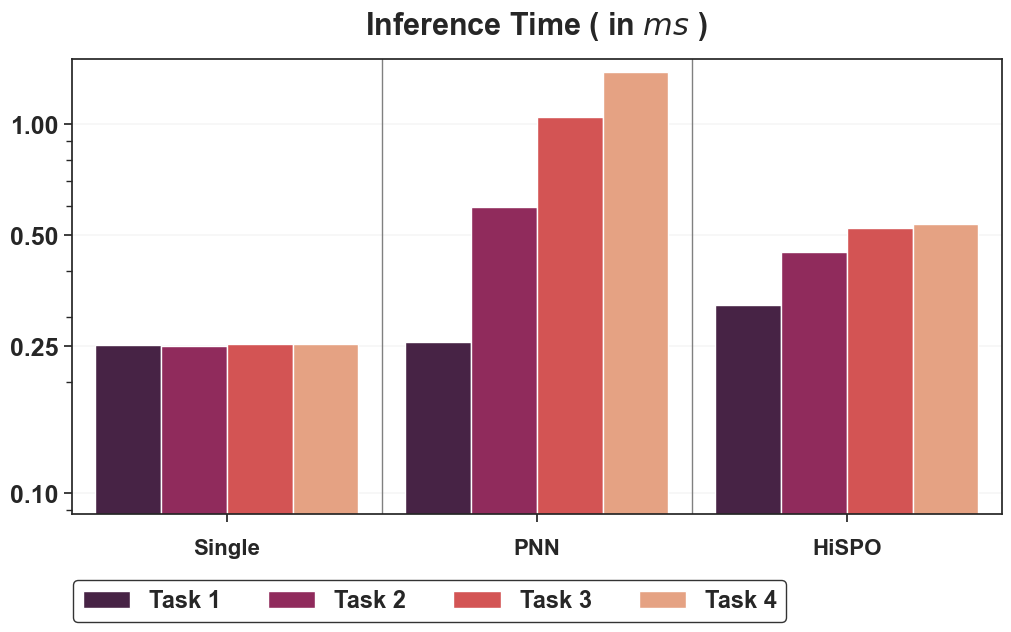

In [13]:
# plot histogram
# x -> methods
# y -> time (in scientific notation in seconds)
# hue -> task_idx

sns.set_theme(style="ticks")

plt.figure(figsize=(12, 5.9))

data_inference_time = pd.read_csv("./plots/inference_time.csv")
data_inference_time

df = data_inference_time

df["TASK_IDX"] = df["TASK_IDX"].apply(lambda x: f"Task {x}")

# just keep : SC1, PNN, HiSPO
# in the plot name SC1 as Single

METHODS = ["SC1", "PNN", "HiSPO"]
df = df[df["METHODS"].isin(METHODS)]
df["METHODS"] = df["METHODS"].apply(lambda x: "Single" if x == "SC1" else x)
METHODS = ["Single", "PNN", "HiSPO"]

ax = sns.barplot(
    x="METHODS", 
    y="TIME", 
    data=df,
    hue="TASK_IDX",
    palette="rocket",
    order=METHODS,
    width=0.85
)

# get x-tick positions (centers of the method groups)
xticks = ax.get_xticks()

# no need to annotate the methods with a central zero
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center', fontsize=16, fontweight='bold', y=-0.025)
ax.set_xlabel("")
# draw vertical lines between method groups
for i in range(len(xticks)-1):
    # compute the midpoint between adjacent ticks
    x_sep = (xticks[i] + xticks[i+1]) / 2
    ax.axvline(x=x_sep, color='gray', linewidth=1.0, linestyle='-')

# y-axis in log scale (values are between 0 and 1.5e-2)
ax.set_yscale("log")
ax.set_ylabel("")

# grid lines (behind bars)
for yline in [1e-3, 2.5e-3 ,5e-3, 1e-2]:
    ax.axhline(yline, color='gray', linewidth=0.125, linestyle='--', zorder=0)

ax.set_ylim(0, 1.5e-2)
ax.set_yticks([1e-3, 2.5e-3 ,5e-3, 1e-2])
ax.set_yticklabels(["0.10", "0.25", "0.50", "1.00"], fontsize=18, fontweight='bold')

# set legend below the plot
ax.legend(title="", title_fontsize=16, fontsize=17, loc='upper center', bbox_to_anchor=(0.385, -0.12), ncol=4, edgecolor='black', prop={'weight': 'bold', 'size': 17})

plt.title("Inference Time ( in $ms$ )", fontsize=22, fontweight='bold', y=1.0375)

# save as pdf
plt.savefig("./plots/inference_time.pdf", bbox_inches='tight')

#### *2.F. Radar Plots*

In [ ]:
data_radar = {
    "METHOD": [
        "SC1", "SC1", "SC1", "SC1", "SC1", "SC1", "SC1",
        "SCN", "SCN", "SCN", "SCN", "SCN", "SCN", "SCN",
        "FT1", "FT1", "FT1", "FT1", "FT1", "FT1", "FT1",
        "FTN", "FTN", "FTN", "FTN", "FTN", "FTN", "FTN",
        "FRZ", "FRZ", "FRZ", "FRZ", "FRZ", "FRZ", "FRZ",
        "RPL", "RPL", "RPL", "RPL", "RPL", "RPL", "RPL",
        "EWC", "EWC", "EWC", "EWC", "EWC", "EWC", "EWC",
        "L2", "L2", "L2", "L2", "L2", "L2", "L2",
        "PNN", "PNN", "PNN", "PNN", "PNN", "PNN", "PNN",
        "HiSPO", "HiSPO", "HiSPO", "HiSPO", "HiSPO", "HiSPO", "HiSPO"
    ],

    "METRIC": [
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
        "PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME",
    ],

    "VALUE": [
        65.8,   -21.9,     0, 1.0, 1.0, 0.002517, 92,
        87.7,       0,     0, 4.0, 4.0, 0.002589, 92,
        70.7,   -18.9,   1.9, 1.0, 1.0, 0.002605, 92,
        89.5,       0,   1.9, 4.0, 4.0, 0.002447, 92,
        60.7,       0, -27.0, 1.0, 1.0, 0.002111, 23,
        83.9,    0.87,  -4.7, 1.0, 1.0, 0.002568, 100,
        72.7,   -18.9,   2.5, 1.0, 9.0, 0.002588, 168,
        66.3,   -18.0,  -5.7, 1.0, 5.0, 0.002445, 137,
        95.0,       0,   5.6, 9.9, 9.9, 0.008221, 159,
        74.7,       0,  -0.1, 3.0, 3.0, 0.004586, 242
    ]
}

data_radar = pd.DataFrame(data_radar)

In [ ]:
min_max = {
    "PER": (0, 100),
    "BWT": (-30, 30),
    "FWT": (-30, 30),
    "INF_MEM": (0, 10),
    "TRN_MEM": (0, 10),
    "INF_TIME": (0, 0.01),
    "TRN_TIME": (20, 250)
}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indicate whether each metric is positively (True) or negatively (False) correlated with "better" performance.
pos_corr = {
    "PER": True,    # higher is better
    "BWT": True,    # higher is better
    "FWT": True,    # higher is better
    "INF_MEM": False,  # lower is better
    "TRN_MEM": False,  # lower is better
    "INF_TIME": False, # lower is better
    "TRN_TIME": False  # lower is better
}

min_max = {
    "PER": (0, 100),
    "BWT": (-30, 10),
    "FWT": (-30, 10),
    "INF_MEM": (0, 10),
    "TRN_MEM": (0, 10),
    "INF_TIME": (0, 0.01),
    "TRN_TIME": (0, 250)
}

def plot_radar(method):

    ordered_metrics = ["PER", "BWT", "FWT", "INF_MEM", "TRN_MEM", "INF_TIME", "TRN_TIME"]
    display_names = {
        "PER": "PER",
        "BWT": "BWT",
        "FWT": "FWT",
        "INF_MEM": "MEM\n(INF)",
        "TRN_MEM": "MEM\n(TRN)",
        "INF_TIME": "TIME\n(INF)",
        "TRN_TIME": "TIME\n(TRN)"
    }

    # Filter the data for the given method
    data_method = data_radar[data_radar["METHOD"] == method]

    # Normalize values for each metric in [0,1],
    # flipping the scale if the metric is negatively correlated (pos_corr[m] == False).
    norm_values = []
    labels = []
    for m in ordered_metrics:
        row = data_method[data_method["METRIC"] == m]
        if not row.empty:
            value = row["VALUE"].iloc[0]
        else:
            value = 0.0  # fallback if missing

        vmin, vmax = min_max[m]
        raw_norm = (value - vmin) / (vmax - vmin)

        if pos_corr[m]:
            # Higher is better => normal normalization
            norm_val = raw_norm
        else:
            # Lower is better => invert the scale
            norm_val = 1.0 - raw_norm

        # Clamp to [0,1] just in case of out-of-range rounding
        norm_val = max(0.1, min(1.0, norm_val))

        norm_values.append(norm_val)
        labels.append(display_names[m])

    n_metrics = len(ordered_metrics)

    # Create angles from 0 to 2π (one per metric)
    theta = np.linspace(0, 2*np.pi, n_metrics, endpoint=False)

    sns.set_theme(style="ticks")

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))

    # Configure polar orientation
    ax.set_theta_zero_location("N")  # put 0° at the top
    ax.set_theta_direction(-1)       # go clockwise

    # Plot bars
    width = 2 * np.pi / n_metrics
    cmap = sns.color_palette("rocket_r", as_cmap=True)
    bars = ax.bar(theta, norm_values, width=width, bottom=0.0, align='center', edgecolor='black')

    import matplotlib.colors as mcolors
    norm = mcolors.PowerNorm(gamma=1.5, vmin=0, vmax=1)

    for bar, val in zip(bars, norm_values):
        bar.set_facecolor(cmap(norm(val)))
        bar.set_edgecolor('black')
        bar.set_linewidth(2)

    # Hide the default x-ticks
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylim(0, 1)
    ax.set_yticklabels([])
    
    # Manually place each label at (angle, radius=1.2) or so
    for i, (angle, label) in enumerate(zip(theta, labels)):
        radius = 1.25

        # Shift angles or radius if needed for label spacing
        if label == "MEM\n(INF)":
            angle -= 0.05
            radius = 1.275
        elif label == "MEM\n(TRN)":
            angle += 0.05
            radius = 1.275
        elif label == "PER":
            radius = 1.125
        elif label == "TIME\n(INF)":
            angle -= 0.025
            radius = 1.25
        elif label == "TIME\n(TRN)":
            angle -= 0.025
            radius = 1.29

        ax.text(
            angle, radius, label,
            ha='center', va='center',
            fontsize=28, fontweight='bold',
            rotation=0, color='gray'
        )

    # Optionally thicken the outer circle
    ax.spines["polar"].set_linewidth(3)
    ax.spines["polar"].set_color("black")

    plt.tight_layout()
    plt.savefig(f"./plots/radars/{method}.pdf", bbox_inches='tight')
    plt.show()

Plotting radar for SC1 ...


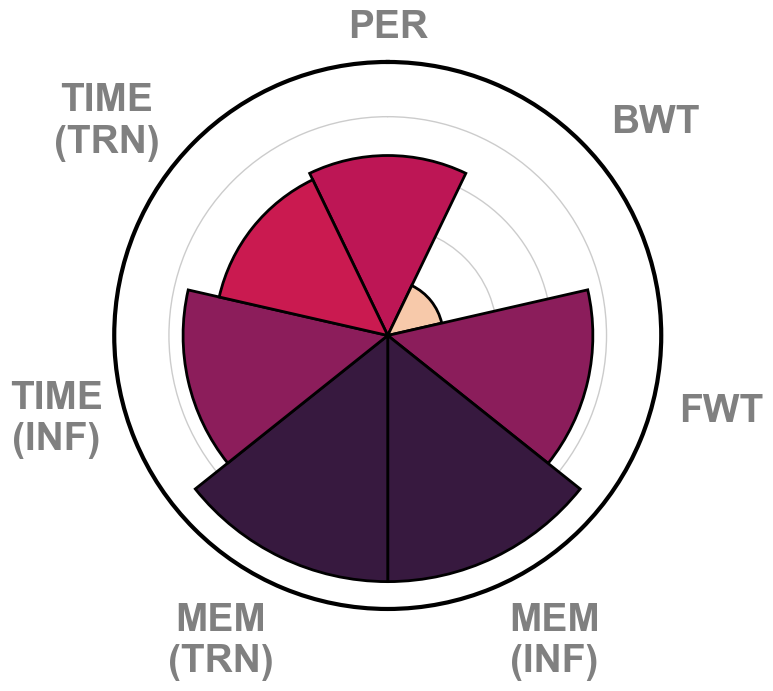

Plotting radar for SCN ...


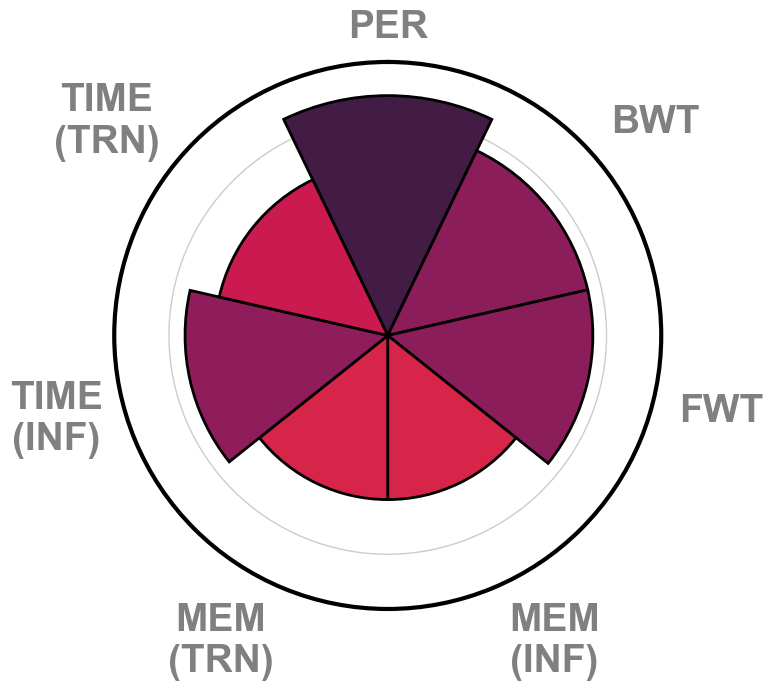

Plotting radar for FT1 ...


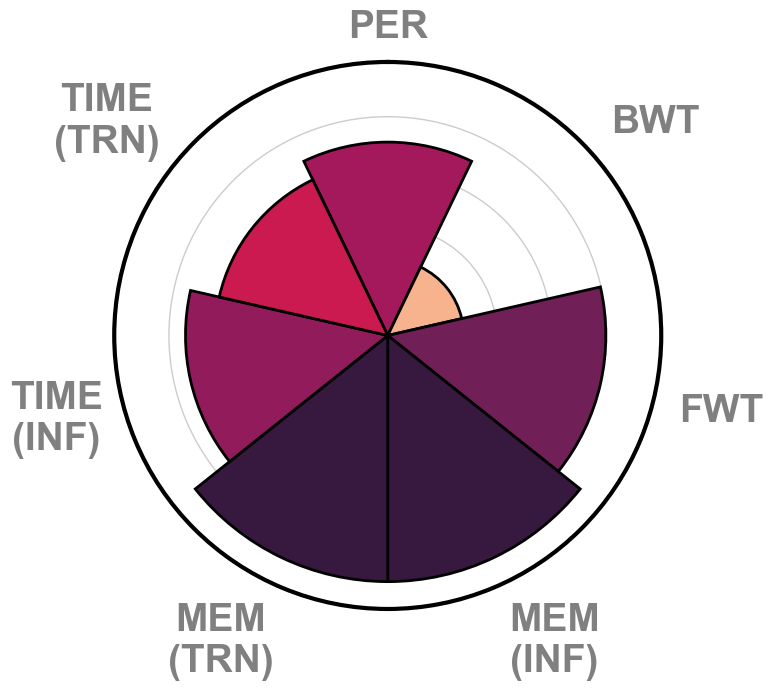

Plotting radar for FTN ...


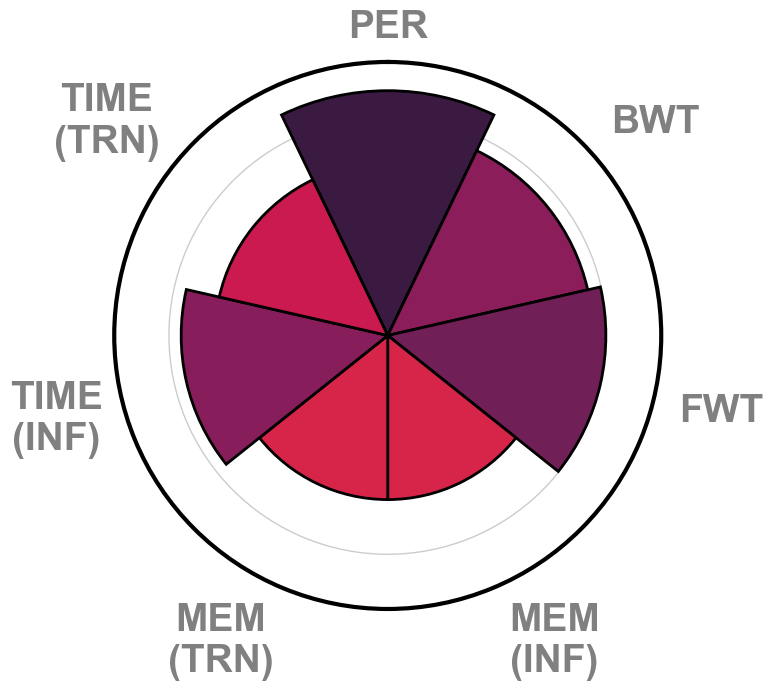

Plotting radar for FRZ ...


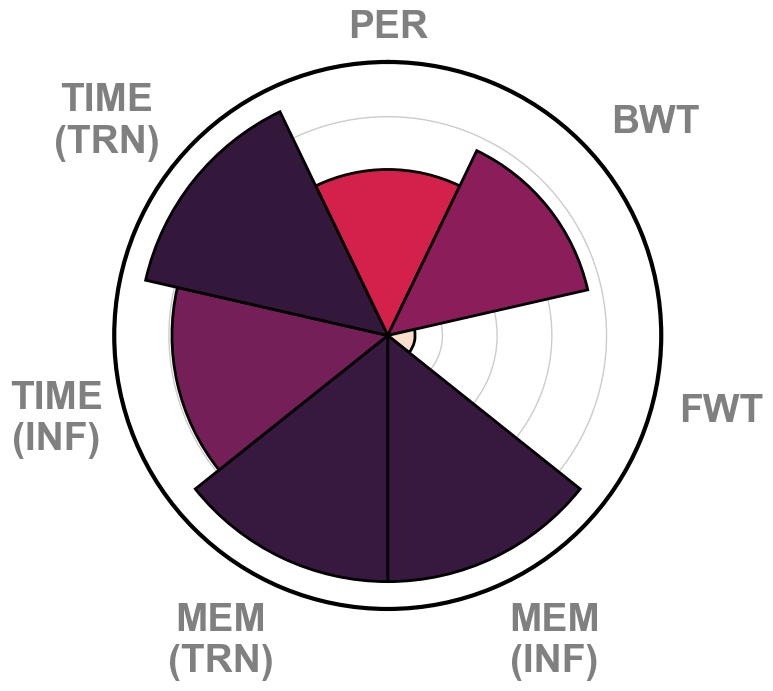

Plotting radar for RPL ...


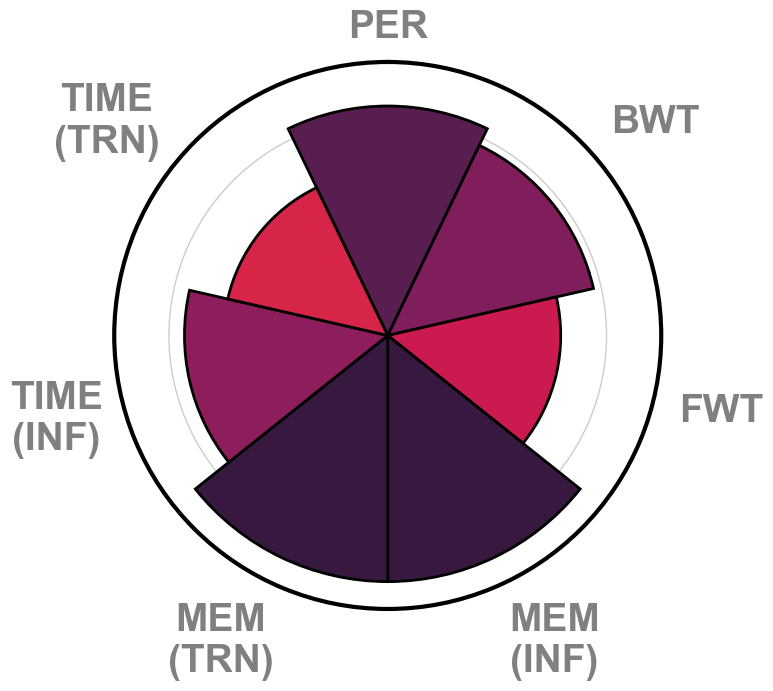

Plotting radar for EWC ...


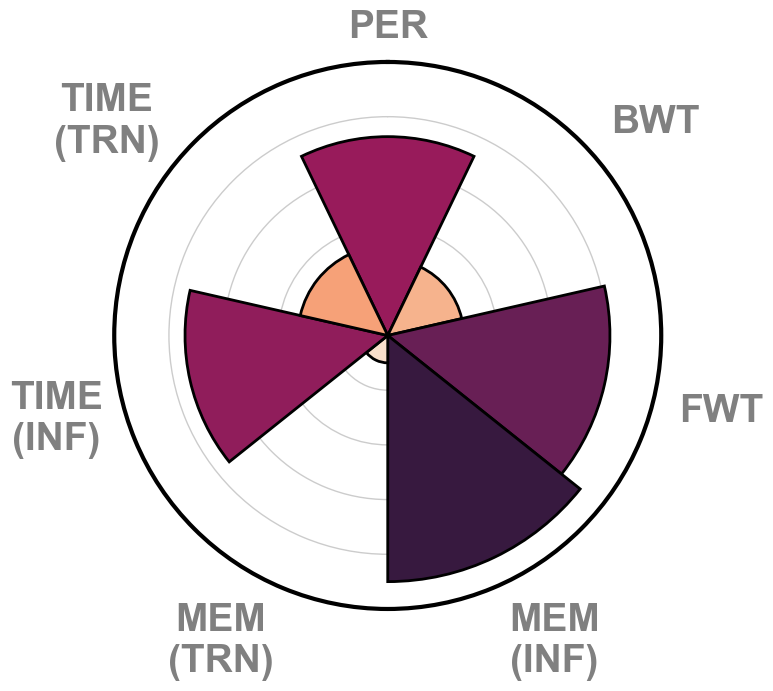

Plotting radar for L2 ...


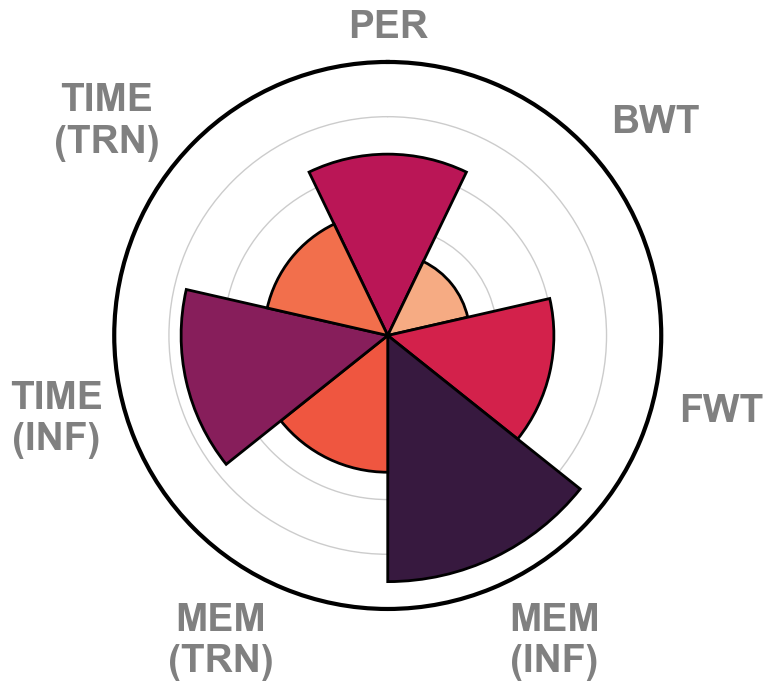

Plotting radar for PNN ...


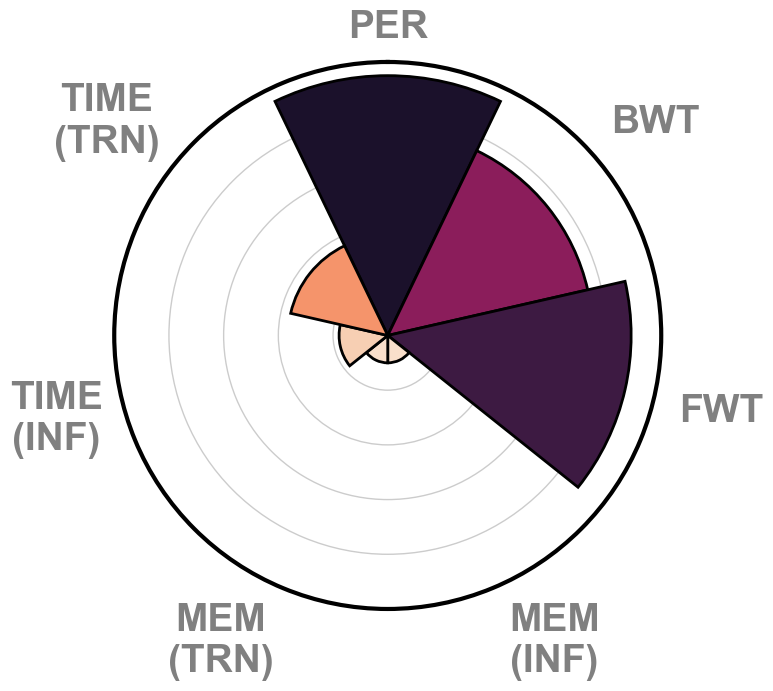

Plotting radar for HiSPO ...


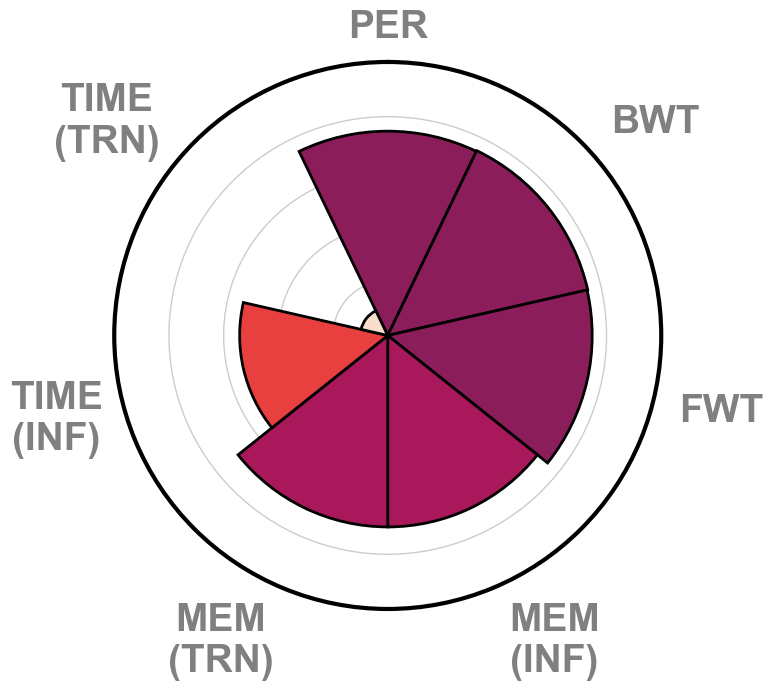

In [ ]:
for method in ["SC1", "SCN", "FT1", "FTN", "FRZ", "RPL", "EWC", "L2", "PNN", "HiSPO"]:
    print(f"Plotting radar for {method} ...")
    plot_radar(method)

___
___